AM207 - Lecture 2:  Basic Probability Review
=====

Verena Kaynig-Fittkau and Pavlos Protopapas, Harvard University

-----------------------------------------------------


In [2]:
## do all neccessary imports
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
sns.set_context("notebook")
import pandas as pd
from  scipy import stats 

import math

import Utilities.utilities as util

# Short review of probability theory, distributions etc

Probabilities are numbers that tell us how often things happen (frequentist) or our believe in a different outcome or notion (Bayesian).  These two views of probabilities (and which one is preferable) are a very disputed topic. In this course we take a very simple approach and we use whatever is convenient at the time, or whatever is better to demonstrate the methodologies we are learning. 

There are a few basic rules that form the basis for all probabilistic methodology. In this lecture, we just briefly review these rules. For an in depth introduction into probability theory, you can for example access the [stat110 material online](http://projects.iq.harvard.edu/stat110/youtube), read Joe Blitzstein's [Introduction to Probability](http://www.amazon.com/gp/product/1466575573/ref=as_li_tl?ie=UTF8&camp=1789&creative=390957&creativeASIN=1466575573&linkCode=as2), or also Larrry Wasserman's [All of Statistics](http://www.amazon.com/All-Statistics-Statistical-Inference-Springer/dp/0387402721). 

Let us define some terminology: $X$ and $Y$ are two events and $p(X)$ is the probability of the event $X$ to happen. $X^- $ is the complement of $X$, the event which is all the occurrences which are not in $X$. $X+Y$ is the union of $X$ and $Y$; $X,Y$ is the intersection of $X$ and $Y$. (Both $X+Y$ and $X,Y$ are also events.)

### The very fundamental rules of probability:

1. $p(X) = 1 \;$ $X$ has to happen

2. $p(X) = 0 \;$ $X$ will certainly not happen

3. $0 ≤ p(X) ≤ 1 \;$ $X$ has probability range from low to high

4. $p(X)+p(X^-)=1 \;$ $X$ must either happen or not happen

5. $p(X+Y)=p(X)+p(Y)−p(X,Y) \;$ $X$ can happen and $Y$ can happen but we must subtract the cases that are happening together so we do not over-count.


For two random variables $x,y$ the $p(x,y)$ is called the joint distribution, and $p(x|y)$ the conditional distribution. 

### Sum rule (marginal distribution)
We can write the marginal probability of $x$ as a sum over the joint distribution of $x$ and $y$ where we sum over all possibilities of $y$,

$$p(x) = \sum_y p(x,y) $$

for continuous random variables this becomes:

$$ p(x) = \int_y p(x,y) \, dy $$

### Product rule ## 
We can rewrite a joint distribution as a product of a conditional and marginal probability,

$$ p(x,y) = p(x|y) p(y) $$

### Chain rule ##
The product rule is applied repeatedly to give expressions for the joint
probability involving more than two variables. For example, the joint distribution over three
variables can be factorized into a product of conditional probabilities:

$$ p(x,y,z) = p(x|y,z) \, p(y,z) = p(x |y,z) \, p(y|z) p(z) $$


### Bayes rule
Given the product rule one can derive the Bayes rule, which plays a central role in a lot of the things we will be talking about:

$$ p(y|x) = \frac{p(x|y) \, p(y) }{p(x)} = \frac{p(x|y) \, p(y) }{\sum_y' p(x,y')} = \frac{p(x|y) \, p(y) }{\sum_y' p(x|y')p(y')}$$

Importantly, we rarely need to explicitly evaluate the denominator $p(x)$. Instead, we can just evaluate the conditional probability up to a
constant of proportionality:

$$ p(y|x) \propto p(x|y) \, p(y) $$


### Independence
Two variables are said to be independent if their joint distribution factorizes into a product of two marginal probabilities:

$$ p(x,y) = p(x) \, p(y) $$ 

Note that if two variables are uncorrelated, that does not mean they are statistically independent. There are many ways to measure statistical association between variables and correlation is just one of them. However, if two variables are independent, this will ensure there is no correlation between them. Another consequence of independence is that if $x$ and $y$ are independent, the conditional probability of $x$ given $y$ is just the probability of $x$:

$$ p(x|y) = p(x) $$

In other words, by conditioning on a particular $y$, we have learned nothing about $x$ because of independence. Two variables $x$ and $y$ and said to be conditionally independent of $z$ if the following holds:

$$ p(x,y|z) = p(x|z) p(y|z) $$

Therefore, if we learn about z, x and y become independent. Another way to write that $x$ and $y$ are conditionally independent of $z$ is 

$$ p(x| z, y) = p(x|z) $$

In other words, if we condition on $z$, and now also learn about $y$, this is not going to change the probability of $x$. It is important to realize that conditional independence between $x$ and $y$ does not imply independence between $x$ and $y$. 

## Distributions 

A probability distribution (aka probability measure) is a function that takes an event and gives its probability. Sometimes this is not well defined in the whole probability space but we will not worry about this for now.
There are two classes of statistical distributions, discete and continous.

### Discrete distributions

### Bernoulli distribution 

The probability for a yes/no outcome of an experiment, is given by the Bernoulli distribution. The Bernoulli distribution is the mother of all distributions. Every experiment, can always be expressed in terms of success/failure. If you do not know which distribution to use, you can think of any problem as a yes/no problem and starting from there you work your way to all other distributions.  

Let $k$ be the outcome of our experiment. Then $p$ is the probability of a success ($k=1$), which means we expect the value $k=1$, $p n$ times out of $n$. The probability for a failure ($k=0$) is $1-p$. For example if we have $p=0.6$ and we repeat our experiment 10 times, we expect 6 experiments to be successful and 4 to be not successful.  

$$ f(k;p) = \begin{cases} p & \text{if }k=1, \\[6pt]
1-p & \text {if }k=0.\end{cases} $$

This can also be expressed as:

$$ f(k;p) = p^k (1-p)^{1-k}\!\quad \text{for }k\in\{0,1\}.$$

The expected value of a Bernoulli random variable $X$ is $E[X] = p$ and the variance is $Var[X]=p(1-p)$

To see this, remember that the expectated value is calculated by $E[X] = \sum_k k \cdot p(k) = 1 \cdot p + 0 \cdot (1-p) = p$ and the variance is $\mathrm{var}(X) = E[X^2] - E[X]^2 = p - p^2 = p(1-p) $

#### How to generate some random numbers from a Bernoulli distribution

We use [scipy.stats](http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) as our library to generate random numbers. For the Bernoulli distribution the library provides the function `.rvs(p, size=1)` to generate random numbers (Random Variates), and `.pmf(x,p)` to compute the Probability Mass Function. 

In [3]:
## Draw and print 10 experiment outcomes for p=0.6
print stats.bernoulli.rvs(p=0.6, size=10)

## compute the probability mass function for p=0.7
stats.bernoulli.pmf([0,1], p=0.7)

[1 1 1 1 1 1 1 1 1 1]


array([ 0.3,  0.7])

#### Example Bernoulli Distribution
Suppose in AM207 last year the class got C or better with probability 0.75. Let the random 
variable X be the probability that someone gets a grade higher than C. 

Number of samples in each bin:  [26 74]


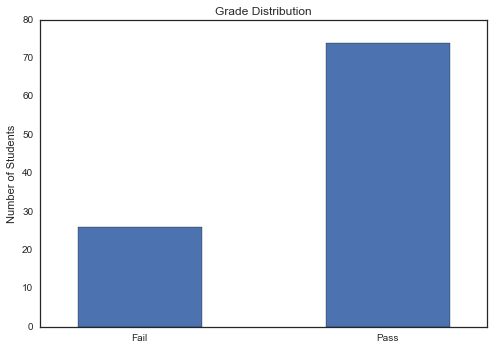

In [34]:
# get the values
grades = stats.bernoulli.rvs(0.75, size=100)
binValues, binBorders = np.histogram(grades, bins=2)

# plot the result
plt.bar([0,1],binValues, width=0.5, align="center")
plt.xticks([0,1], ('Fail','Pass') )
util.set_labels("Grade Distribution", "", "Number of Students")

print "Number of samples in each bin: ", binValues

## Binomial distribution

While the Bernoulli distribution describes the outcome of a single experiment, the Binomial distribution is the distribution of the number of successes in a sequence of $n$ independent yes/no experiments, each of which yields success with probability $p$. Thus, the Bernoulli distribution is equal to the Binomial distribution when $n=1$.   

$$f(k; n, p) = {n\choose k}p^k(1-p)^{n-k} $$

where

$${n\choose k}=\frac{n!}{k!(n-k)!}$$

The expected value of a random variable $X$ is $E[X]=np$ and the variance is $Var[X]=np(1-p)$

The following plot shows histograms for data generated from a Binomial distribution with different values for $p$. 

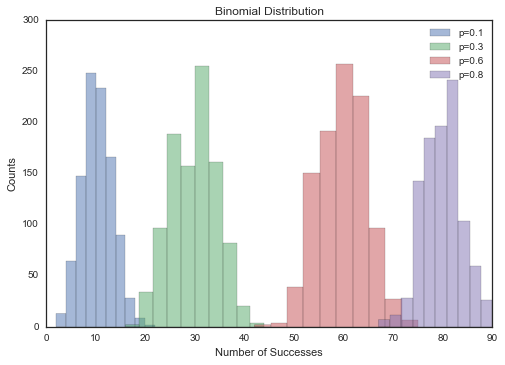

In [5]:
# generate and plot random variates for different values of p
for p in [0.1, 0.3, 0.6, 0.8]:
    randomVariates = stats.binom.rvs(100, p, size=1000)
    plt.hist(randomVariates, alpha=0.5, label='p=' + np.str(p))

plt.legend()
util.set_labels("Binomial Distribution","Number of Successes","Counts")
plt.show()

#### Example Binomial distribution

What is the probability of 30 people getting a C or higher this year assuming we have 50 students in total?

In [26]:
numberOfStudents = 30
totalNumberOfStudents = 50
p = 0.75

print "The probability of 30 students passing AM207 is:"
print stats.binom.pmf(numberOfStudents, totalNumberOfStudents, p)

The probability of 30 students passing AM207 is:
0.00765470143105


That seems rather low, if we forget that we asked for the probability of exactly 8 students passing AM207, not at least 8 students. Let's look at the full histogram.

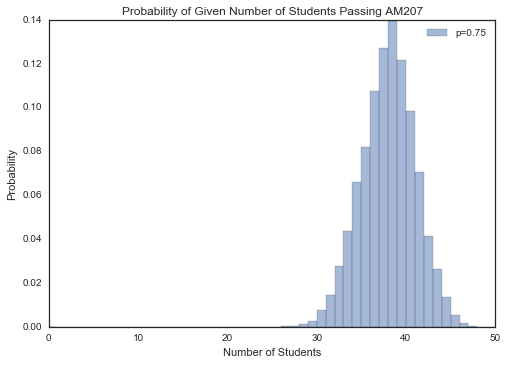

In [27]:
randomVariates = stats.binom.rvs(totalNumberOfStudents, p=p, size=10000)
plt.hist(randomVariates, bins=range(0,totalNumberOfStudents+1), alpha=0.5, normed=True, label='p=' + np.str(p))

plt.legend()
util.set_labels("Probability of Given Number of Students Passing AM207","Number of Students","Probability")
plt.show()

As you can see the probability of 30 students passing is indeed rather low, but the probability of 40 students passing is much higher. What if we would like to know the probability of at least 30 students passing? We could look at the cumulative distribution and go from there, or we can use our samples from above and just count.

In [8]:
print "Probability of at least 30 students passing AM207: ", np.sum(randomVariates>numberOfStudents)/float(len(randomVariates))

Probability of at least 30 students passing AM207:  0.9859


## Poisson distribution

The Poisson distribution is another discrete distribution, it expresses the probability of a given number of events occurring in a fixed interval of time (or space, volume, etc.). One assumption made is that these events occur with a known average rate and independently of each other. An example is the number of electrons detected by a sensor in an electron microscope during a time interval, or the number of soldiers in the Prussian army killed accidentally by horse kicks [(see here)](http://en.wikipedia.org/wiki/Poisson_distribution).

The Poisson distribution is defined as:


$$ f(k; \lambda)= \frac{\lambda^k e^{-\lambda}}{k!}, $$

where $k$ is the number of events, $\lambda$ is a positive real number, and $e$ is Euler's number ($e = 2.71828 \ldots$).

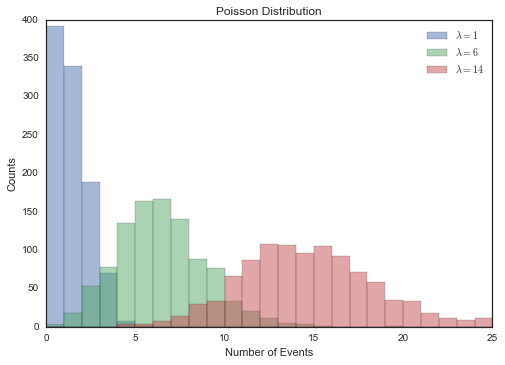

In [9]:
# generate samples for different values of lambda
for lambdaParameter in [1,6,14]:
    randomVariates = stats.poisson.rvs(lambdaParameter, size=1000)
    plt.hist(randomVariates, alpha=0.5, bins=range(0,26), label='$\lambda=' + np.str(lambdaParameter) + '$')

plt.legend()
util.set_labels("Poisson Distribution","Number of Events","Counts")
plt.show()

## Continuous variables

The difficulty with continuous random variables is that you can’t find the probability of the exact event. The problem is  that every value of a concrete random variate is $0$, but if you add enough values together you have something with a positive value. So the usual way around this difficulty, is to define probabilities for intervals.

### Normal Distribution

Probably the most important of all distributions is the normal distribution. Many phenomena in nature follow this distribution. Due to the Central Limit Theorem which states that, the distribution of a sum of random variables can be approximated by a normal distribution. A Normal distribution with mean $\mu$ and standard deviation $\sigma$ is defined as:

$$ f(x; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{(x-\mu)^2}{2\sigma^2} }, $$

So if your data is the sum of many independent processes it is most likely normally distributed (or very close to it). An important example are measurement errors.
Let's look at some normal distributions.

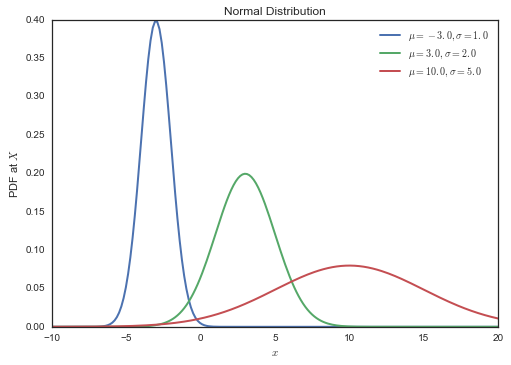

In [10]:
x = np.linspace(-10,20, num=200)

for mu, sigma in zip([-3, 3, 10], [1, 2, 5]):
    plt.plot(x, stats.norm.pdf(x, mu, sigma), lw=2, 
             label = r"$\mu = {0:.1f}, \sigma={1:.1f}$".format(mu, sigma))
    
    
plt.legend()
util.set_labels("Normal Distribution", "$x$", "PDF at $X$")

### Exponential Distribution
The exponential distribution is the probability distribution that describes the time between events in a Poisson process,i.e. a process in which events occur continuously and independently at a constant average rate.

Note that the exponential distribution is not the same as the class of exponential families of distributions, which is a large class of probability distributions that includes the exponential distribution as one of its members, but also includes the normal distribution, binomial distribution, gamma distribution, Poisson, and many others.

$$f(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}$$

Therefore, the random variable X has an exponential distribution with parameter $\lambda$, we say $X$ is exponential and write
$ X∼Exp(\lambda)$
Given a specific $\lambda$, the expected value of an exponential random variable is equal to the inverse of $\lambda$, that is:
$E[X|\lambda]=\frac{1}{\lambda}$

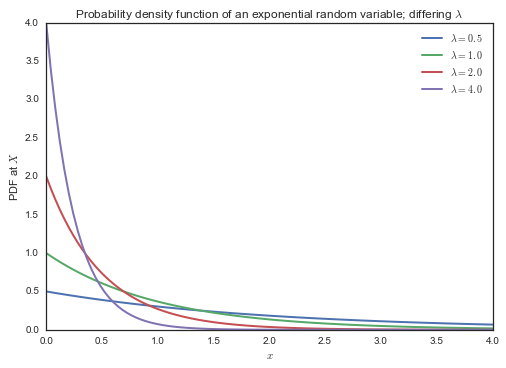

In [11]:
x = np.linspace(0,4, 100)
lambdaParameter = [0.5, 1, 2, 4]
for l in lambdaParameter:
    plt.plot(x, stats.expon.pdf(x, scale=1./l), lw=2, label = "$\lambda = %.1f$"%l)
    
plt.legend()
util.set_labels("Probability density function of an exponential random variable;\
 differing $\lambda$", 
           "$x$", "PDF at $X$")

## Multivariate random variates

Lets look at some data and how it is distributed. The following file contains 10,000 samples. Each sample gives the height, weight, and gender of a test person. We use pandas to read the data into a data frame. Pandas is a very useful Python library, that will make your life sometimes harder, but most of the time simpler. 

In [12]:
dataFrame = pd.read_csv("./Lecture02_data/01_heights_weights_genders.csv")
dataFrame.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


If we would know the distribution of this data, we could just fit the distribution function by estimating the parameters. If we don't know the distribution we can use a histogram to find out what the distribution of the data looks like. 

Let's plot the 2D histogram of the height and the weight measurements:

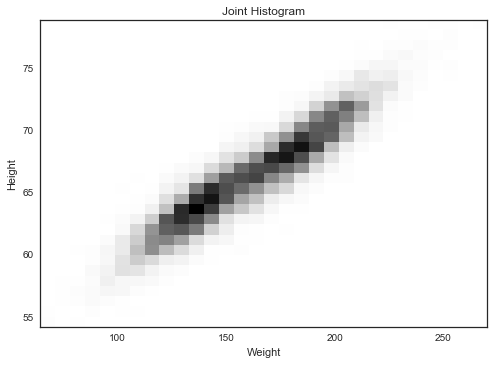

In [13]:
plt.hist2d(dataFrame.Weight, dataFrame.Height, bins=30)
util.set_labels("Joint Histogram", "Weight", "Height")
plt.show()

The plot shows the joint histogram of height and weight. We can also use a kernel density estimate to get a continuous representation:

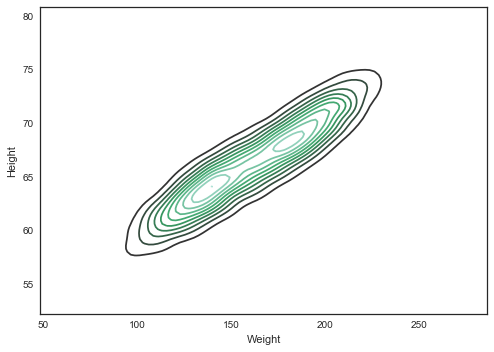

In [14]:
# use kernel density estimation plot to get smooth contours
sns.kdeplot(dataFrame.Weight, dataFrame.Height)
plt.show()

In this representation it is a bit easier to see that our joint distribution is slightly bimodal. How about the marginal? This is as simple as taking the histogram ignoring one of the dimensions. For example in order to marginalize over _Height_ we can just take the histogram of _Weight_ as:

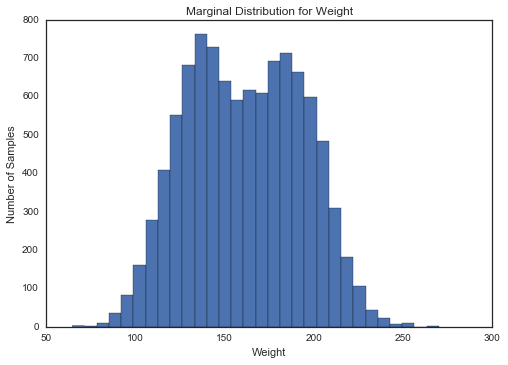

In [15]:
plt.hist(dataFrame.Weight, bins=30)
util.set_labels("Marginal Distribution for Weight","Weight","Number of Samples")

Finally how about conditional? Lets assume we want the probability distribution for _Weight_ given _Height_ is 65. As explained above with continuous variables we should use intervals rather than exact values. Say we want the conditional given that _Height_ is between 63 and 65. 

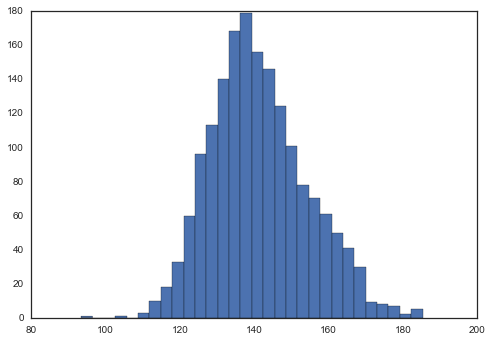

In [16]:
conditional_data = dataFrame.Weight[(dataFrame.Height>63) & (dataFrame.Height<65)]
plt.hist(conditional_data.values, bins=30)
plt.show()

Seaborn is very convenient to visualize the joint and marginal together:

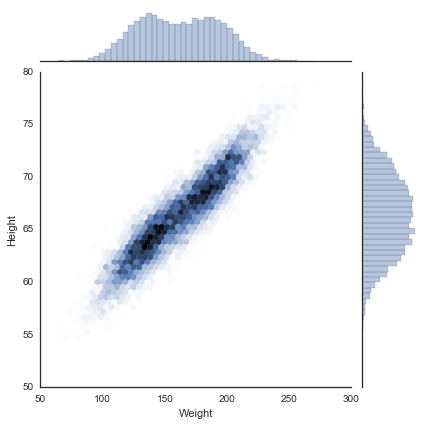

In [36]:
sns.jointplot(dataFrame.Weight, dataFrame.Height, kind="hex", stat_func=None)
plt.show()